{% include toc title="In This Chapter" icon="file-text" %}



In [1]:
# Importing packages needed to complete this lesson
import os

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import earthpy as et

In [2]:
# Creating a home directory
home_dir = os.path.join(et.io.HOME, 'earth-analytics',
                        'data', 'earthpy-downloads')
if not os.path.isdir(home_dir):
    os.makedirs(home_dir)

# Set your working directory
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data',
                      'earthpy-downloads'))

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 1: Open a Text File

Use the code below to download a `.csv` file containing data for the 
climbing formations in the Boulder, Colorado: 

`et.data.get_data(url="https://opendata.arcgis.com/datasets/175425c25d8849b58feb89483ef02961_1.csv")`

Once you have downloaded the data:

1. Read the data into **Python** as a **pandas** `DataFrame`. IMPORTANT: Name your dataframe object **boulder_climbing**.
2. View the pandas `DataFrame`. Look at the columns in the data. Find the `FormationType` column. Notice how it's categorically split between two different types of formations.  
</div>

In [3]:
# Download the data that you will use in this lesson
et.data.get_data(
    url="https://opendata.arcgis.com/datasets/175425c25d8849b58feb89483ef02961_1.csv")

'/Users/elsa/earth-analytics/data/earthpy-downloads/OSMP_Climbing_Formations.csv'

In [4]:
# This code will clean up your file name
# This is a temporary fix for a bug in our earthpy package!
old_name_climb = '"OSMP_Climbing_Formations.csv"'
new_name_climb = 'OSMP_Climbing_Formations.csv'
if not os.path.exists(new_name_climb):
    os.rename(old_name_climb, new_name_climb)

IMPORTANT. When you download the data, you may notice that there are quotes 
around the file name like this: `"OSMP_Climbing_Formations.csv"`. You 
will need to call

In [5]:
# Read in the data and view the first few rows of data
boulder_climbing = pd.read_csv(new_name_climb)
boulder_climbing

,X,Y,OBJECTID,ID,FEATURE,ROUTES,HCA,OWNER,SeasonalClosure,AreaAccess,UseRating,AKA,ClosureActive,PERMITREQ,FormationType,Display,FixedHardwarePermit
0,-105.294224,40.005020,1,1.0,Pumpkin Rock,4.0,No,OSMP,N,Flagstaff,2.50,First Areas,N,No,Boulder,Yes,NaN
1,-105.287861,39.975276,2,2.0,Veranda,2.0,No,OSMP,N,NCAR,0.00,NaN,N,No,Wall,Yes,NaN
2,-105.293598,39.995411,3,3.0,Third Pinnacle,7.0,No,OSMP,N,Gregory Canyon,1.25,NaN,N,No,Wall,Yes,NaN
3,-105.294391,39.986358,4,4.0,The Fin,1.0,No,OSMP,Y,Chautauqua,1.17,NaN,Y,No,Wall,Yes,NaN
4,-105.292811,39.995952,5,6.0,First Pinnacle,23.0,No,OSMP,N,Gregory Canyon,2.20,NaN,N,No,Wall,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-105.289838,39.978304,1179,NaN,Ridge 2,NaN,No,OSMP,Y,NCAR,2.00,Satans Slab,Y,No,Boulder,Yes,NaN
451,-105.291101,39.978087,1180,NaN,Ridge 3,NaN,No,OSMP,Y,NCAR,1.50,NaN,Y,No,Boulder,Yes,Yes
452,-105.288788,39.965708,1181,NaN,Fiddlehead,NaN,No,OSMP,Y,Cragmoor Rd,0.00,NaN,Y,No,Wall,Yes,NaN
453,-105.288176,39.973912,1189,NaN,Sunnny Side One,NaN,No,OSMP,N,NCAR,5.50,NaN,N,No,Boulder,Yes,NaN


## How to Convert x,y Coordinate Data To A GeoDataFrame (or shapefile) - Spatial Data in Tabular Formats

Often you will find that tabular data, stored in a text or
spreadsheet format, contains spatial coordinate information
that you wish to plot or convert to a shapefile for use 
in a GIS application. In the challenge below, you will learn 
how to convert tabular data containing coordinate information
into a spatial file.

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 2: Create a Spatial GeoDataframe From a DataFrame 

You can create a Geopandas `GeoDataFrame` from a Pandas `DataFrame` if there is coordinate data in the DataFrame. 
In the data that you opened above, there are columns for the `X` and `Y` coordinates of each rock formation - with headers named `X` and `Y`. 

You can convert columns containing **x,y** coordinate data using the **GeoPandas**  `points_from_xy()` function as follows:

`coordinates = gpd.points_from_xy(column-with-x-data, column-with-y-data.Y)`

You can then set the geometry column for the new GeoDataFrame 
to the **x,y** data that you extracted from the data frame. 

```python
gpd.GeoDataFrame(data=boulder_climbing, 
                 geometry=coordinates)
```

`GeoDataFrame`. Copy the code below to create a new GeoDataFrame containing the boulder climbing area data in a spatial format that you can plot. 

IMPORTANT: be sure to assign the output of the code below to a new variable
name called `boulder_climbing_gdf`.

```python

coordinates = gpd.points_from_xy(boulder_climbing.X, boulder_climbing.Y)
gpd.GeoDataFrame(data=boulder_climbing, 
                 geometry=coordinates)
```

In your code:

1. Copy the code above to create a `GeoDataFrame` from the `DataFrame` that you created above. 
2. Next, plot your data using `.plot()`

</div>

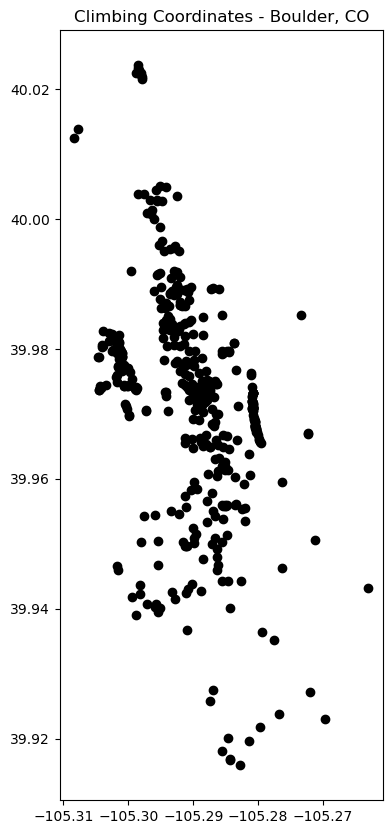

In [6]:
# Create your geodataframe
coordinates = gpd.points_from_xy(boulder_climbing.X, boulder_climbing.Y)

boulder_climbing_gdf = gpd.GeoDataFrame(data=boulder_climbing,
                                        geometry=coordinates)

# Create a plot
f, ax1 = plt.subplots(figsize=(10, 10))
boulder_climbing_gdf.plot(ax=ax1,
                          color="black")

# Add a title
ax1.set(title="Climbing Coordinates - Boulder, CO")
plt.show()


<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** You can easily export data
in a GeoPandas format to a shapefile using `object_name_here.to_file("file-name-here.shp")`. Following the example above, if you want to export a shapefile called boulder-climbing.shp, your code would look like
this: `boulder_climbing_gdf.to_file("boulder-climbing.shp")`. 
</div>


In [7]:
# Export GeoPandas GeoDataFrame to ShapeFile
boulder_climbing_gdf.to_file("boulder-climbing.shp")

/var/folders/dn/99vk45cd5n56wsnl3hxc1bw40000gp/T/ipykernel_2995/751944266.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  boulder_climbing_gdf.to_file("boulder-climbing.shp")


<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 3: Create a Base Map

Next, you will create a basemap. Run code below to download another file for boulder. Notice that the data this time are in `geojson` format
rather than a shapefile. Even though the format is different, the data can be worked with using Geopandas in the same way that you would work with 
a shapefile using `read_file()`. 

The data file is:  

`et.data.get_data(url="https://opendata.arcgis.com/datasets/955e7a0f52474b60a9866950daf10acb_0.geojson")`

The code below downloads and cleans up the file name.
</div>

In [8]:
# Get the data
et.data.get_data(
    url="https://opendata.arcgis.com/datasets/955e7a0f52474b60a9866950daf10acb_0.geojson")

# This code will clean up your file name
# This is a temporary fix for a bug in our earthpy package!
old_name_city = '"City_Limits.geojson"'
new_name_city = 'City_Limits.geojson'
if not os.path.exists(new_name_city):
    os.rename(old_name_city, new_name_city)

FileNotFoundError: [Errno 2] No such file or directory: '"City_Limits.geojson"' -> 'City_Limits.geojson'

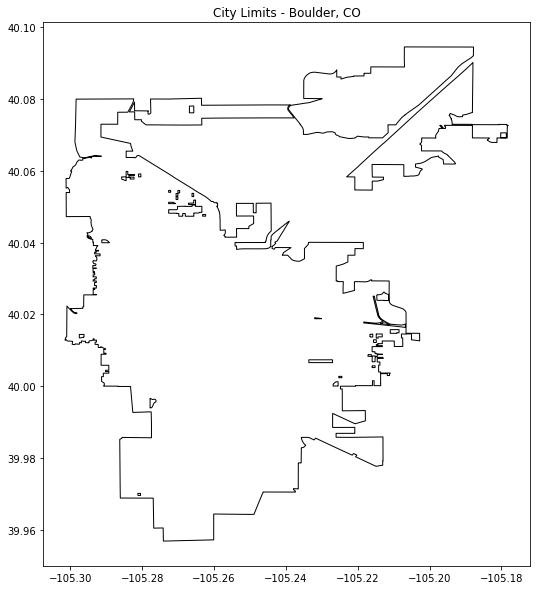

In [9]:
# In this cell, open up and plot the `City_Limits.geojson` geojson file
city_limits = gpd.read_file(new_name_city)
city_limits.head()


# Create a plot
f, ax1 = plt.subplots(figsize=(10, 10))
city_limits.plot(ax=ax1,
                 edgecolor="black",
                 color="white")

# Add a title
ax1.set(title="City Limits - Boulder, CO")
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 4: Plot Two GeoDataFrames Together in the Same Figure

Previously, you learned how to plot multiple shapefiles or spatial
layers on the same map using **matplotlib**.

1. Use what you learned in the spatial vector lesson in this chapter to plot the climbing formations points layer on top of the cities boundary that you opened above. 
2. Use the `edgecolor=` and the `color=` parameters to change the colors of the city object. (example: color="white", edgecolor="grey")
3. Use `legend=True` to add a legend to your map.
4. Set `column='FormationType'` to plot your points according tot he type of climbing formation it is (Boulder vs Wall).

HINT: Refer back to the vector lesson if you forget how to create your plot!
</div>

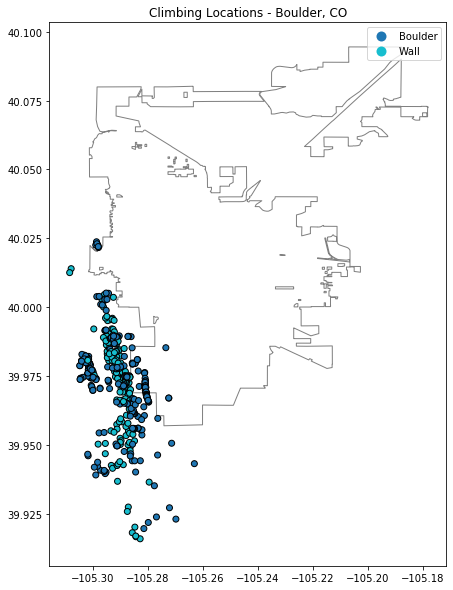

In [10]:
# Add your code to plot the data here
f, ax1 = plt.subplots(figsize=(10, 10))
city_limits.plot(ax=ax1,
                 edgecolor="grey", color="white")
boulder_climbing_gdf.plot(ax=ax1, edgecolor="black",
                          column='FormationType', legend=True)


# Add a title
ax1.set(title="Climbing Locations - Boulder, CO")
plt.show()

# Turn of x and y data ticks
ax1.set_axis_off()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 5: Customize Your Map

Next, you will customize the map that you created above. 
Here's what you need to do to spruce up your map:


1. Add a title to your map using `ax.set_title()`. 
2. Set the `figsize` of the map to be larger so the data is more clearly shown. The `figsize` is one of the arguments in `plt.subplots` and needs to be set to a **tuple** of numbers. For example: `plt.subplots(figsize=(10, 10)`. 
3. Turn off the x and y axis data ticks to make the plot look more like a map using: `ax.set_axis_off()`.
4. Customize the colors of the city boundary using the parameters: `color="color-name-here"` to change the color of the fill of the polygon. Use `edgecolor="color-name-here"` to change the outline color of the polygon. HINT: you may want to set `color="white"` for the polygon and make the edgecolor a darker color so you have a clean outline. 
5. Play around with modifying the markers for the points. The marker is the symbol used to represent the x,y location. The default marker is a circle. Modify the `marker=` and `markersize=` parameters in the `plot()` function for the climbing formations in order to make it more legible. Here is a list of marker options in matplotlib: https://matplotlib.org/3.2.1/api/markers_api.html. 

Examples of modifying the marker and marker size: 

`object.plot(marker="*", markersize=5)`

---------

OPTIONAL: See what happens when you use the `cmap="Greens"` argument.

HINT: see this documentation to learn more about color maps in python: https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

--------
Have fun customizing your map!

</div>

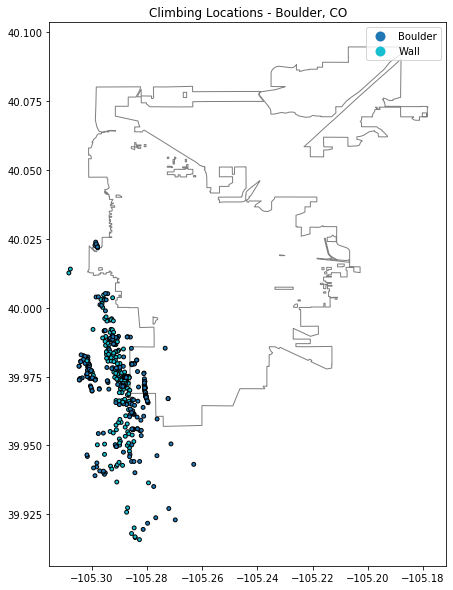

In [11]:
# Add your code here to plot the data
f, ax1 = plt.subplots(figsize=(10, 10))
city_limits.plot(ax=ax1,
                 edgecolor="grey", color="white")
boulder_climbing_gdf.plot(ax=ax1, edgecolor="black",
                          column='FormationType', legend=True, markersize=15)


# Add a title
ax1.set(title="Climbing Locations - Boulder, CO")
plt.show()

## OPTIONAL: Interactive Spatial Maps Using Folium

Above you created maps that were static that you could not interact with.
You can make interactive maps with Python in Jupyter Notebooks too
using the **Folium** package. 

Set your GeoDataFrame name for your climbing formations to the variable specified in the code below, `climbing_locations`. 

```
import folium

#Define coordinates of where we want to center our map
map_center_coords = [40.015, -105.2705]

#Create the map
my_map = folium.Map(location = map_center_coords, zoom_start = 13)

for lat,long in zip(climbing_locations.geometry.y, climbing_locations.geometry.x):
    folium.Marker(
        location=[lat, long],
    ).add_to(my_map)

my_map

```
and run it in your code to see what happens! 

More reading on how to use **Folium** [here](https://www.earthdatascience.org/tutorials/introduction-to-leaflet-animated-maps/)

In [12]:
# In this cell, uncomment the line below.
# This should set your GeoDataFrame to our
# variable name to make the code with folium run

# climbing_locations = boulder_climbing_gdf

In [13]:
climbing_locations = boulder_climbing_gdf

In [14]:
# Copy the code above and paste is in this cell below
import folium

# Define coordinates of where we want to center our map
map_center_coords = [40.015, -105.2705]

# Create the map
my_map = folium.Map(location=map_center_coords, zoom_start=13)

for lat, long in zip(climbing_locations.geometry.y, climbing_locations.geometry.x):
    folium.Marker(
        location=[lat, long],
    ).add_to(my_map)

my_map

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> BONUS Challenge: Clip Climbing Formations to the City of Boulder

In the vector notebook, you learned how to clip spatial data. In your code, do the following:

1. Clip the climbing formations to the boundary of the city of Boulder. 
2. Plot the clipped points on top of the city boundary. 
</div>

If you want, you could create another folium map of the clipped data!

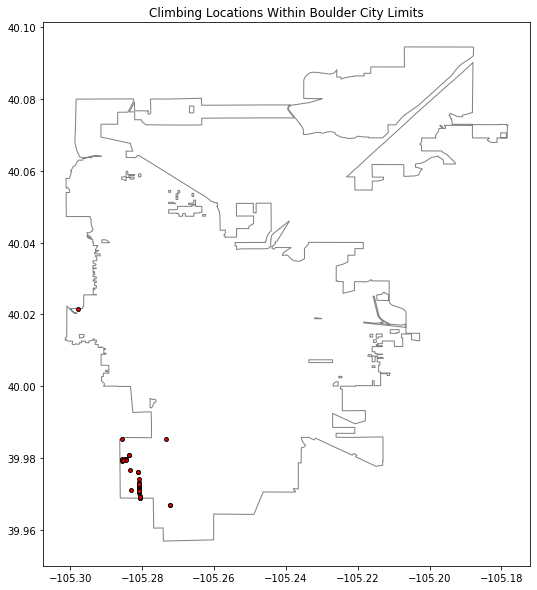

In [15]:
# Place your code to clip and plot your data here
# It's fine to make new cells below if you wish!

# Below this line clip the cities data to the Canada boundary that you created above.
climbing_in_boulder = gpd.clip(boulder_climbing_gdf, city_limits)

# Make a plot
f, ax = plt.subplots(figsize=(10, 10))
city_limits.plot(ax=ax,
                 edgecolor="grey", color="white")
climbing_in_boulder.plot(ax=ax, edgecolor="black", color="red", markersize=15)
ax.set(title="Climbing Locations Within Boulder City Limits")
plt.show()